# Amazon Fine Food Reviews Analysis
Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews
The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


#### Objective:
Given a review, determine whether the review is positive (Rating of 4 or 5) or negative (rating of 1 or 2).


<img src="https://i1.wp.com/www.jerseygirltalk.com/wp-content/uploads/2017/10/Amazon-Fresh.png?w=560">

In [1]:
!pip install --upgrade "ipython[all]"

Requirement already up-to-date: ipython[all] in /usr/local/lib/python3.6/dist-packages (6.4.0)
Requirement not upgraded as not directly required: pexpect; sys_platform != "win32" in /usr/local/lib/python3.6/dist-packages (from ipython[all]) (4.6.0)
Requirement not upgraded as not directly required: traitlets>=4.2 in /usr/local/lib/python3.6/dist-packages (from ipython[all]) (4.3.2)
Requirement not upgraded as not directly required: jedi>=0.10 in /usr/local/lib/python3.6/dist-packages (from ipython[all]) (0.12.1)
Requirement not upgraded as not directly required: decorator in /usr/local/lib/python3.6/dist-packages (from ipython[all]) (4.3.0)
Requirement not upgraded as not directly required: setuptools>=18.5 in /usr/local/lib/python3.6/dist-packages (from ipython[all]) (39.1.0)
Requirement not upgraded as not directly required: simplegeneric>0.8 in /usr/local/lib/python3.6/dist-packages (from ipython[all]) (0.8.1)
Requirement not upgraded as not directly required: pygments in /usr/local

In [2]:
!pip install pydrive
!pip install gensim
!pip install nltk
!pip install seaborn
!pip install xgboost
!wget --header='Host: doc-14-34-docs.googleusercontent.com' --header='User-Agent: Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36' --header='Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8' --header='Accept-Language: en-US,en;q=0.9' --header='Cookie: AUTH_sl8scr3r78dtlbjs5mvoco4ilf6h1a3b=09929041593969215305|1531468800000|u59ib6rmr97ctn3dvalen1hqiaup4fhq; NID=130=LXZwJ_B1s7OlagMooX3o0cdKaSHL3frN5ha4lIftM8TuGzoTCmfcWXpJ3cNRIcbkyUPqb3Jy-XQmP9UHSogzUlrWBiowlnwfwg3Cx-F6T5acQOD-gO27Uk1dFzgik3yZ' --header='Connection: keep-alive' 'https://doc-14-34-docs.googleusercontent.com/docs/securesc/sr3ne958tilodvhhec79bitjd2u2bnlr/t4ul11orpkbo7g1j7a551rv07qf911pf/1531468800000/09929041593969215305/09929041593969215305/1cZS7OUXVft4KTZ1AzZPu95hSgWzu3aC8?e=download' -O 'final.sqlite' -c

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
--2018-07-24 08:33:55--  https://doc-14-34-docs.googleusercontent.com/docs/securesc/sr3ne958tilodvhhec79bitjd2u2bnlr/t4ul11orpkbo7g1j7a551rv07qf911pf/1531468800000/09929041593969215305/09929041593969215305/1cZS7OUXVft4KTZ1AzZPu95hSgWzu3aC8?e=download
Resolving doc-14-34-docs.goog

In [3]:
!pip install pydrive
!pip install gensim
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [0]:
downloaded = drive.CreateFile({'id':'1cZS7OUXVft4KTZ1AzZPu95hSgWzu3aC8'}) # replace the id with id of file you want to access
downloaded.GetContentFile('final.sqlite')

In [0]:
# loading libraries and data

%matplotlib inline

import sqlite3                          # for sql database
import pandas as pd
import numpy as np
import nltk                             # nltk:- Natural Language Processing Toolkit
import string
import re
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


import pickle
def saveindisk(obj,filename):
    pickle.dump(obj,open(filename+".p","wb"), protocol=4)
def openfromdisk(filename):
    temp = pickle.load(open(filename+".p","rb"))
    return temp


con = sqlite3.connect("final.sqlite")

# Filtering only positive and negative reviews that is
# not taking into consideration those reviews with score = 3
df = pd.read_sql_query("""
SELECT *
FROM Reviews
""", con)

In [6]:
df.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,CleanedText_NoStem
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,Positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,b'bought sever vital can dog food product foun...,b'bought several vitality canned dog food prod...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,Negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,b'product arriv label jumbo salt peanut peanut...,b'product arrived labeled jumbo salted peanuts...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,Positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,b'confect around centuri light pillowi citrus ...,b'confection around centuries light pillowy ci...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,Negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,b'look secret ingredi robitussin believ found ...,b'looking secret ingredient robitussin believe...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,Positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...,b'great taffi great price wide assort yummi ta...,b'great taffy great price wide assortment yumm...


In [7]:
df.describe()

,index,Id,HelpfulnessNumerator,HelpfulnessDenominator,Time
count,364171.000000,364171.000000,364171.000000,364171.000000,3.641710e+05
mean,241825.377603,261814.561014,1.739021,2.186841,1.296135e+09
std,154519.869452,166958.768333,6.723921,7.348482,4.864772e+07
min,0.000000,1.000000,0.000000,0.000000,9.393408e+08
25%,104427.500000,113379.500000,0.000000,0.000000,1.270858e+09
50%,230033.000000,249445.000000,0.000000,1.000000,1.311379e+09
75%,376763.500000,407408.500000,2.000000,2.000000,1.332893e+09
max,525813.000000,568454.000000,866.000000,878.000000,1.351210e+09


In [8]:
df.shape

(364171, 13)

In [9]:
df['Score'].size

364171

In [10]:
# Taking Sample Datapoints
n_samples = 40000
df_sample = df.sample(n_samples)
df_sample.sort_values('Time', inplace=True) #Sorting with respect to time
df_sample.head()

,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanedText,CleanedText_NoStem
169281,212472,230285,B00004RYGX,A344SMIA5JECGM,Vincent P. Ross,1,2,Positive,944438400,A modern day fairy tale,"A twist of rumplestiskin captured on film, sta...",b'twist rumplestiskin captur film star michael...,b'twist rumplestiskin captured film starring m...
169267,212458,230269,B00004RYGX,A1B2IZU1JLZA6,Wes,19,23,Negative,948240000,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",b'alway enjoy movi funni entertain didnt hesit...,b'always enjoyed movie funny entertaining didn...
104684,121041,131217,B00004RAMX,A5NQLNC6QPGSI,Kim Nason,7,8,Positive,965001600,End your Gopher Problems,I have just recently purchased the Woodstream ...,b'recent purchas woodstream corp gopher trap w...,b'recently purchased woodstream corp gopher tr...
169341,212532,230347,B00004RYGX,A1FJOY14X3MUHE,Justin Howard,2,2,Positive,966297600,"A fresh, original film from master storyteller...","This is such a great film, I don't even know h...",b'great film dont even know sum first complet ...,b'great film dont even know sum first complete...
117351,138018,149790,B00004S1C6,A1IU7S4HCK1XK0,Joanna Daneman,25,27,Positive,982800000,Make your own Martha Stewart style cakes and c...,I don't know why anyone would ever use those l...,b'dont know anyon would ever use littl liquid ...,b'dont know anyone would ever use little liqui...


In [0]:
def polarity(x):
    if x == "Positive":
        return 0
    else:
        return 1
df_sample['Score'] = df_sample['Score'].map(polarity)

In [0]:
def plot_confusion_matrix_(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    df_cm = pd.DataFrame(cm, index = labels,
                  columns = labels)
    # convert to percentage
    df_cm = df_cm.divide(df_cm.sum(axis=1), axis='index') * 100
    sns.heatmap(df_cm, annot=True, fmt='.1f');
    plt.show()

# Applying the Decision Tree on the different Vectorizing Techniques


## Bag of Word(BOW)

<img src="https://cdn-images-1.medium.com/max/1600/0*Yclq0kqMAwCQcIV_.jpg">

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Breaking into Train and test
X_train, X_test, y_train, y_test = train_test_split(df_sample['CleanedText'].values,df_sample['Score'].values,test_size=0.3,shuffle=False)

bi_gram = CountVectorizer() 
X_train = bi_gram.fit_transform(X_train)
X_train = preprocessing.normalize(X_train)

X_test = bi_gram.transform(X_test)
X_test = preprocessing.normalize(X_test)

In [0]:
# GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

clf = DecisionTreeClassifier()
param_grid = {'max_depth': np.concatenate((np.arange(1, 20), np.arange(20, 500, 20)))} # params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 43 candidates, totalling 430 fits


In [15]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.86      0.98      0.92      9873
          1       0.74      0.24      0.36      2127

avg / total       0.84      0.85      0.82     12000



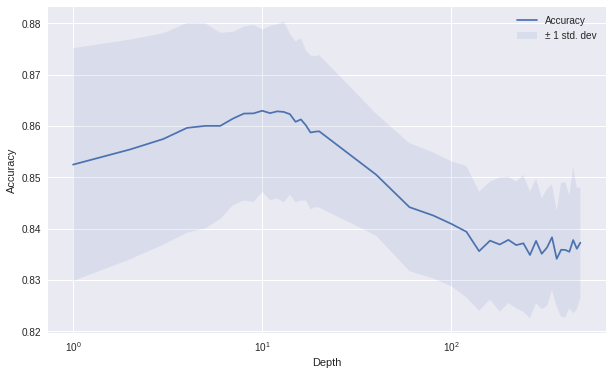

In [16]:
# Plot Accuracy - Depth 
mean_score = gsv.cv_results_['mean_test_score']
std_score = gsv.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_score, label='Accuracy')
plt.fill_between(param_grid['max_depth'], mean_score + std_score, mean_score - std_score, alpha=0.1, label='± 1 std. dev')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()
plt.xscale('log')

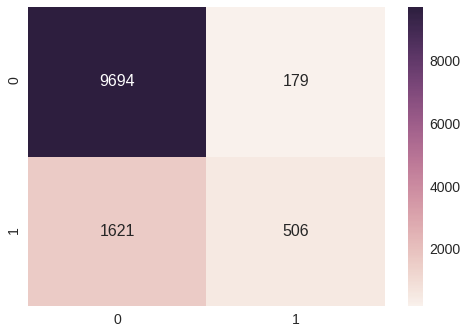

In [17]:
pred = gsv.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

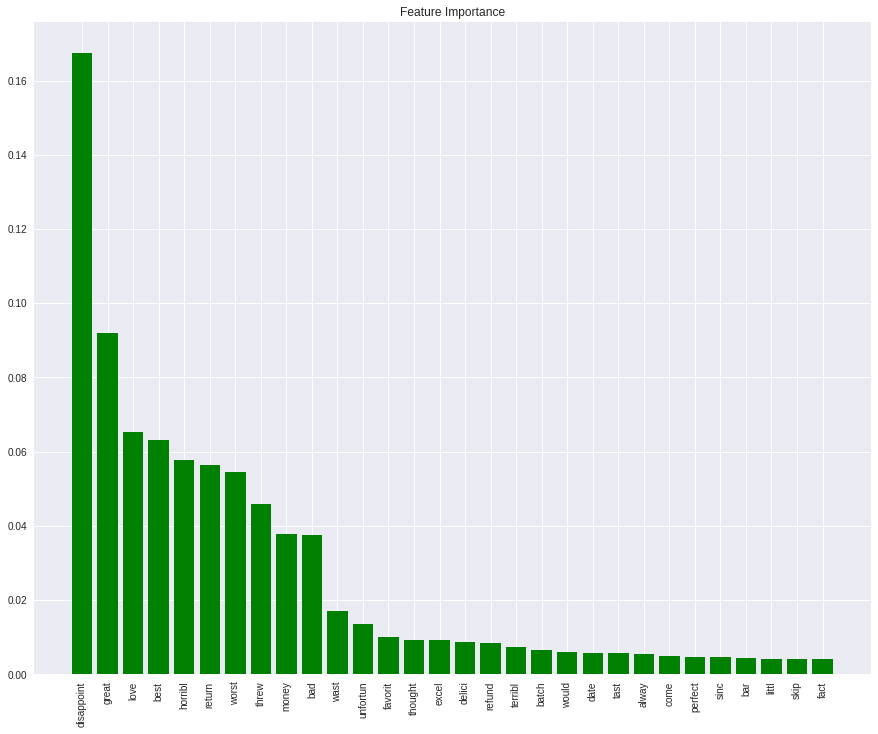

In [18]:
from matplotlib import pyplot
importances = gsv.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1][:30]
names = bi_gram.get_feature_names()
sns.set(rc={'figure.figsize':(15,12)})
plt.figure()
plt.title("Feature Importance")
plt.bar(range(30), importances[indices], color='g')
names = np.array(names)
plt.xticks(range(30), names[indices], rotation=90)
plt.show()

# Tf-Idf Features

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df_sample['CleanedText'].values,df_sample['Score'].values,test_size=0.3,shuffle=False)

In [20]:
tfidf = TfidfVectorizer(ngram_range=(1,2))
X_train = tfidf.fit_transform(X_train)

X_train = preprocessing.normalize(X_train)
print("Train Data Size: ",X_train.shape)
X_test = tfidf.transform(X_test)

X_test = preprocessing.normalize(X_test)
print("Test Data Size: ",X_test.shape)

Train Data Size:  (28000, 504790)
Test Data Size:  (12000, 504790)


In [21]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.8293333333333334


In [22]:
# GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

clf = DecisionTreeClassifier()
param_grid = {'max_depth': np.concatenate((np.arange(1, 20), np.arange(20, 500, 50)))} # params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 29 candidates, totalling 290 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 23.5min
[Parallel(n_jobs=-1)]: Done 290 out of 290 | elapsed: 74.5min finished


Best HyperParameter:  {'max_depth': 9}
Best Accuracy: 86.43%


In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.86      0.98      0.92      9873
          1       0.76      0.26      0.38      2127

avg / total       0.84      0.85      0.82     12000



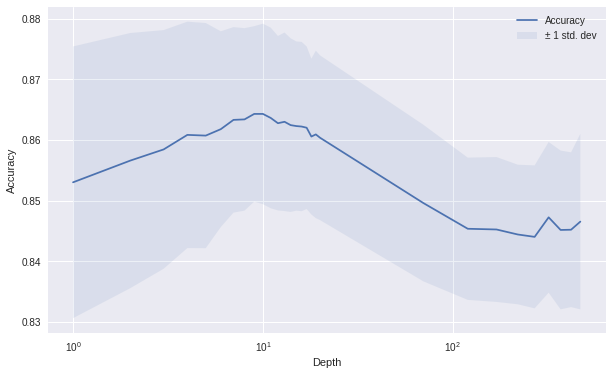

In [24]:
# Plot Accuracy - Depth 
mean_score = gsv.cv_results_['mean_test_score']
std_score = gsv.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_score, label='Accuracy')
plt.fill_between(param_grid['max_depth'], mean_score + std_score, mean_score - std_score, alpha=0.1, label='± 1 std. dev')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()
plt.xscale('log')

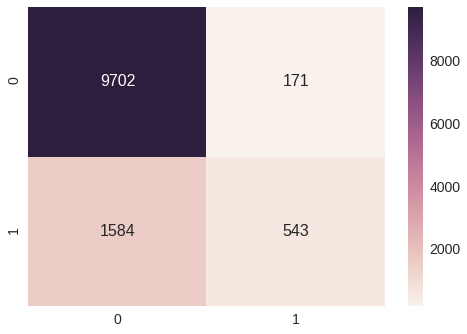

In [25]:
pred = gsv.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# Avg Word2Vec

In [0]:
list_corpus = df_sample["Text"].tolist()
list_labels = df_sample["Score"].tolist()

In [27]:
from gensim.models import KeyedVectors
!wget -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
w2v_model_google = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

--2018-07-24 10:11:19--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.129.125
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.129.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘GoogleNews-vectors-negative300.bin.gz’

300.bin.gz           89%[================>   ]   1.37G  16.9MB/s    eta 6s     GoogleNews-vectors- 100%[===================>]   1.53G  18.1MB/s    in 54s     

2018-07-24 10:12:13 (29.3 MB/s) - ‘GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [0]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_questions, generate_missing=False):
    embeddings = clean_questions['CleanedText'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [0]:
embeddings = get_word2vec_embeddings(w2v_model_google, df_sample)
X_sample, _, y_sample, _ = train_test_split(embeddings, list_labels, test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample)

In [30]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.8504285714285714


In [31]:
# GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

clf = DecisionTreeClassifier()
param_grid = {'max_depth': np.concatenate((np.arange(1, 20), np.arange(20, 50, 50)))} # params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.9min finished


Best HyperParameter:  {'max_depth': 1}
Best Accuracy: 84.40%


In [32]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      5953
          1       0.00      0.00      0.00      1047

avg / total       0.72      0.85      0.78      7000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


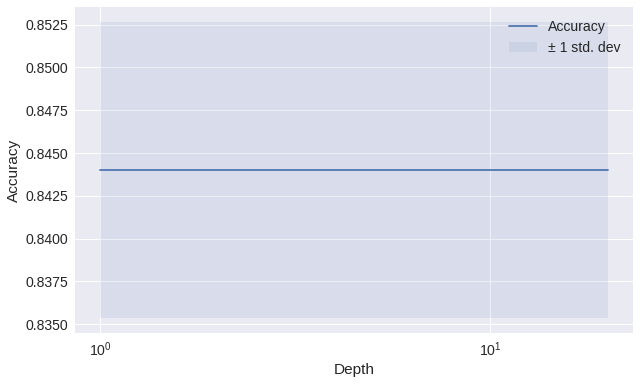

In [33]:
# Plot Accuracy - Depth 
mean_score = gsv.cv_results_['mean_test_score']
std_score = gsv.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_score, label='Accuracy')
plt.fill_between(param_grid['max_depth'], mean_score + std_score, mean_score - std_score, alpha=0.1, label='± 1 std. dev')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()
plt.xscale('log')

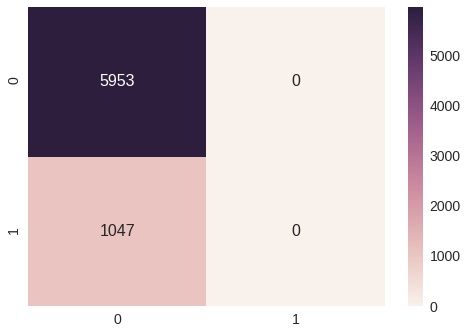

In [34]:
pred = gsv.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

# Tf-IDF Word2vec

In [35]:
n_samples = 5000
df_sample_new = df_sample.sample(n_samples)
df_sample_new.sort_values('Time',inplace=True) 

from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,2)) # Using bi-grams
tfidf_vec_new = tfidf.fit_transform(df_sample_new['CleanedText_NoStem'].values)
print(tfidf_vec_new.shape)
features = tfidf.get_feature_names()

(5000, 152256)


In [36]:
tfidf_w2v_vec_google = []
review = 0

for sent in df_sample_new['CleanedText_NoStem'].values:
    cnt = 0 
    weighted_sum  = 0
    sent_vec = np.zeros(300)
    sent = sent.decode("utf-8") 
    for word in sent.split():
        try:
            wvec = w2v_model_google.wv[word] 
            tfidf_vec = tfidf_vec_new[review,features.index(word)]
            sent_vec += (wvec * tfidf_vec)
            weighted_sum += tfidf_vec
        except:
            pass
    sent_vec /= weighted_sum
    tfidf_w2v_vec_google.append(sent_vec)
    review += 1
tfidf_w2v_vec_google = np.array(tfidf_w2v_vec_google)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # This is added back by InteractiveShellApp.init_path()


In [0]:
tfidfw2v_vecs_norm = preprocessing.normalize(tfidf_w2v_vec_google)

In [0]:
X_sample, _, y_sample, _  = train_test_split(tfidfw2v_vecs_norm, df_sample_new['Score'], test_size=0.3)
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample)

In [39]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.7611428571428571


In [40]:
# GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit

clf = DecisionTreeClassifier()
param_grid = {'max_depth': np.concatenate((np.arange(1, 20), np.arange(20, 50, 50)))} # params we need to try on classifier
tscv = TimeSeriesSplit(n_splits=10) # For time based splitting
gsv = GridSearchCV(clf,param_grid,cv=tscv,verbose=1,n_jobs=-1)
gsv.fit(X_train,y_train)
print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy: %.2f%%"%(gsv.best_score_*100))

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   56.6s finished


Best HyperParameter:  {'max_depth': 1}
Best Accuracy: 83.40%


In [41]:
print("                 Classification Report Test Data")
print(classification_report(y_test, gsv.predict(X_test)))

                 Classification Report Test Data
             precision    recall  f1-score   support

          0       0.86      1.00      0.92       752
          1       0.00      0.00      0.00       123

avg / total       0.74      0.86      0.79       875



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


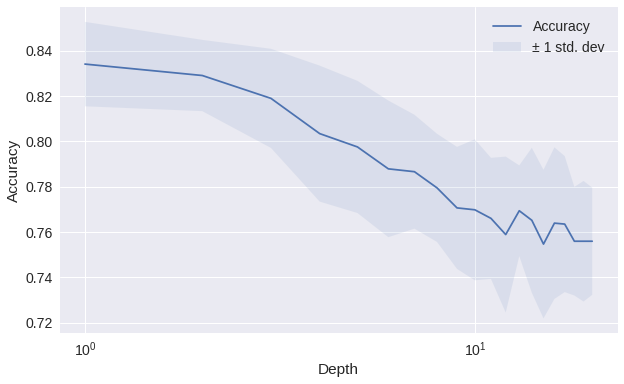

In [42]:
# Plot Accuracy - Depth 
mean_score = gsv.cv_results_['mean_test_score']
std_score = gsv.cv_results_['std_test_score']
plt.figure(figsize=(10, 6))
plt.plot(param_grid['max_depth'], mean_score, label='Accuracy')
plt.fill_between(param_grid['max_depth'], mean_score + std_score, mean_score - std_score, alpha=0.1, label='± 1 std. dev')
plt.ylabel('Accuracy')
plt.xlabel('Depth')
plt.legend()
plt.xscale('log')

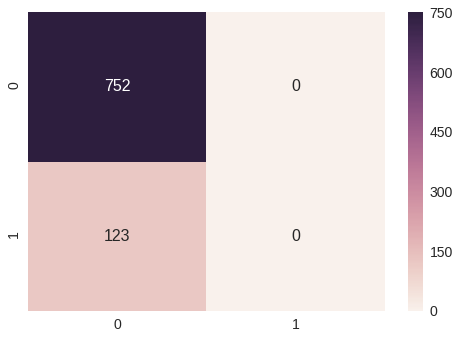

In [43]:
pred = gsv.predict(X_test)
df_cm = pd.DataFrame(confusion_matrix(y_test, pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

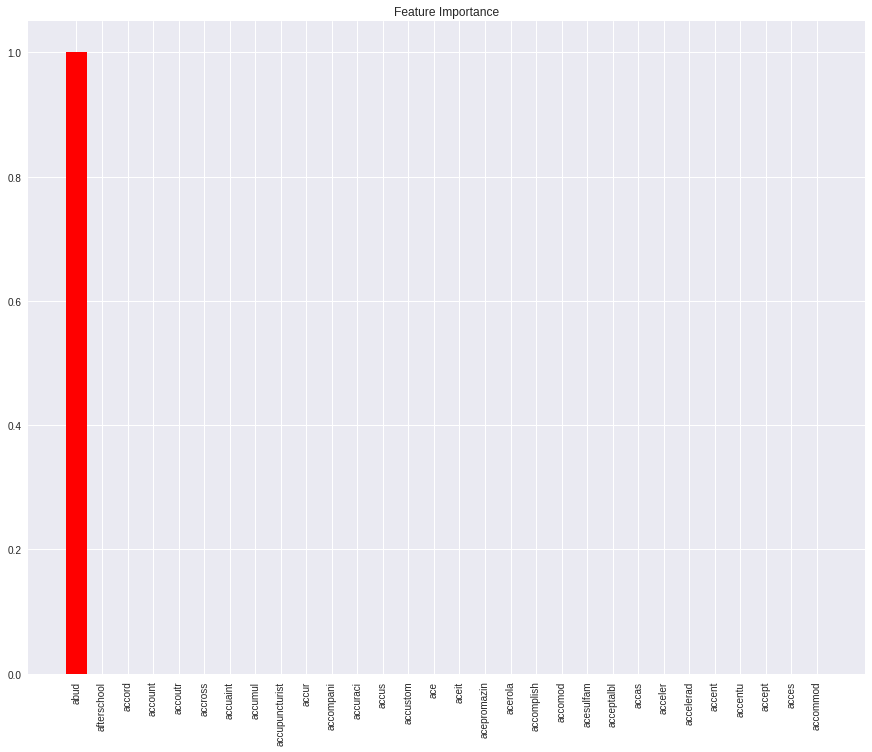

In [44]:
from matplotlib import pyplot
importances = gsv.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1][:30]
names = bi_gram.get_feature_names()
sns.set(rc={'figure.figsize':(15,12)})
plt.figure()
plt.title("Feature Importance")
plt.bar(range(30), importances[indices], color='r')
names = np.array(names)
plt.xticks(range(30), names[indices], rotation=90)
plt.show()

<img src="DT1.png">

# Conclusion:
* Decision Trees on bi-gram, tfidf, avgword2vec and tfidfword2vec using depth 430 as max_depth
* TF-IDF Featurizatiom(max_depth=9) gave the best accuracy of 86.43 and F1-Score of 0.82